Analysis
- There is no strong relationship between latitude and cloudiness.
- Wind speed tends to generally be betweeen 0 and 15 mph regardless of latitude.
- Temperature seems to have a clear correlation with latitude

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&q="

cities

['pacific grove',
 'tiksi',
 'grand gaube',
 'qaanaaq',
 'upernavik',
 'ziro',
 'mudgee',
 'gornozavodsk',
 'rikitea',
 'illoqqortoormiut',
 'bredasdorp',
 'lusambo',
 'hasaki',
 'atuona',
 'touros',
 'severo-kurilsk',
 'san matias',
 'ostrovnoy',
 'odweyne',
 'ushuaia',
 'hilo',
 'murray bridge',
 'hobart',
 'chokurdakh',
 'te anau',
 'sao miguel do tapuio',
 'taolanaro',
 'belushya guba',
 'coria',
 'iqaluit',
 'hithadhoo',
 'palmer',
 'vaini',
 'punta arenas',
 'busselton',
 'avera',
 'bako',
 'ovalle',
 'eureka',
 'bengkulu',
 'kerteh',
 'albany',
 'ariquemes',
 'jamestown',
 'north las vegas',
 'pecos',
 'dingle',
 'puerto ayora',
 'nizhneyansk',
 'pangnirtung',
 'avarua',
 'buala',
 'la ronge',
 'narsaq',
 'iskateley',
 'yamada',
 'butaritari',
 'coquimbo',
 'izhma',
 'faanui',
 'mataura',
 'longyearbyen',
 'berlevag',
 'new norfolk',
 'carnarvon',
 'hofn',
 'khasan',
 'putla',
 'aldine',
 'port alfred',
 'nantucket',
 'vaitupu',
 'dikson',
 'arraial do cabo',
 'north bend',
 'ma

In [5]:
response = requests.get(query_url + cities[1]).json()

n_City=[]
clouds=[]
n_Country=[]
date=[]
humidity=[]
lat=[]
lng=[]
m_Temp=[]
w_Speed =[]

response

{'coord': {'lon': 128.87, 'lat': 71.69},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'model',
 'main': {'temp': 237.49,
  'feels_like': 231.69,
  'temp_min': 237.49,
  'temp_max': 237.49,
  'pressure': 1028,
  'humidity': 85,
  'sea_level': 1028,
  'grnd_level': 1010},
 'wind': {'speed': 2.69, 'deg': 229},
 'clouds': {'all': 0},
 'dt': 1579905848,
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 32400,
 'id': 2015306,
 'name': 'Tiksi',
 'cod': 200}

In [6]:
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        
        #print(response) ver como esta construido el json de la información y asi extraer la informacion bien
        n_City.append(response["name"])
        clouds.append(response["clouds"]["all"])
        n_Country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        m_Temp.append(response["main"]["temp_max"])
        w_Speed.append(response["wind"]["speed"])
        #contador = 1 + contador #Cuenta los registros es decir las llamadas del API
        #print(f"Processing Record {contador} | {response['name']}")
        time.sleep(1)
     #   
     #   print(f"Processing Record {Contador} | {response['name']}")
    except:
        print("City not found. Skipping...")
    continue

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [10]:
#Pasamos nuestra informacion de la api aun diccionario
dic_w={"City": n_City,
    "Cloudiness":clouds, 
    "Country":n_Country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": m_Temp,
    "Wind Speed":w_Speed}


In [15]:
#Convertimos nuestro diccionario a un data frame
weather_df = pd.DataFrame(dic_w)

In [16]:
#Pasamos nuestro dataframe a un csv
weather_df.to_csv('weather_data.csv')
weather_df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [17]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pacific Grove,1,US,1579905780,67,36.62,-121.92,293.71,2.60
1,Tiksi,0,RU,1579905848,85,71.69,128.87,237.49,2.69
2,Grand Gaube,75,MU,1579905965,94,-20.01,57.66,299.15,5.70
3,Qaanaaq,0,GL,1579905965,49,77.48,-69.36,251.39,4.28
4,Upernavik,85,GL,1579905966,95,72.79,-56.15,247.39,1.88


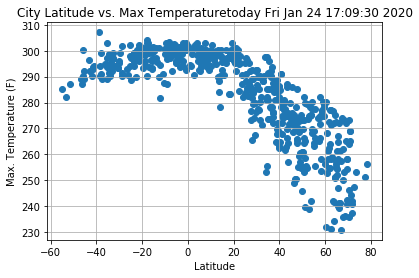

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")
localtime = time.asctime( time.localtime(time.time()) )
plt.title("City Latitude vs. Max Temperaturetoday "+localtime)
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("picture1.png")

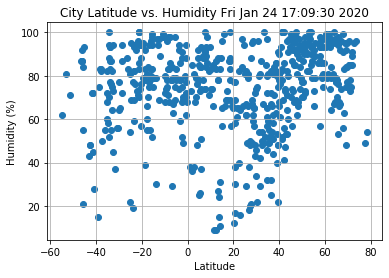

<Figure size 432x288 with 0 Axes>

In [37]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity "+localtime)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("picture2.png")

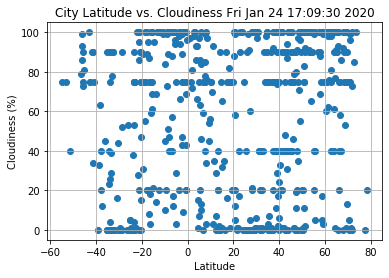

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness "+localtime)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("picture3.png")




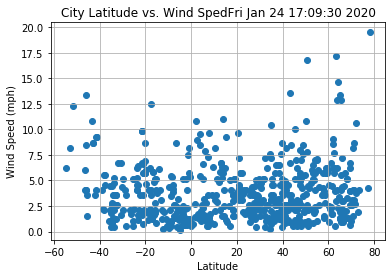

<Figure size 432x288 with 0 Axes>

In [41]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Sped" + localtime)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("picture4.png")

In [126]:
from scipy import stats

#FUNCION PARA GENERAR PLOT CON REGRESION LINEAL
def reg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    yvalue=y.min()+10
    plt.annotate(line_eq,xy=(-40,yvalue),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.savefig("picture"+y.name+".png")
    plt.show
   

The r-squared is: -0.7691092563378199


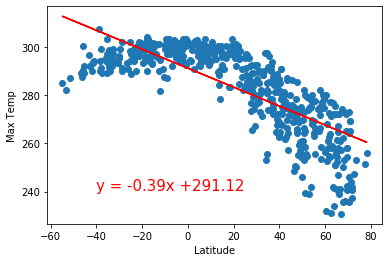

In [127]:
reg_plot(weather_df["Lat"], weather_df["Max Temp"])

The r-squared is: 0.11455092818014329


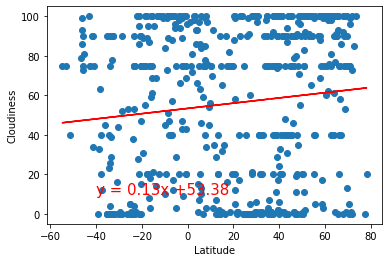

In [128]:
reg_plot(weather_df["Lat"], weather_df["Cloudiness"])


The r-squared is: 0.03391656960798616


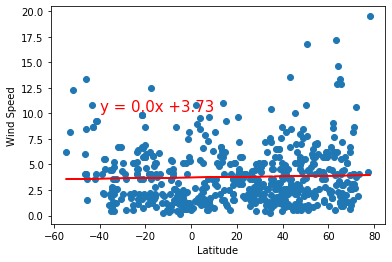

In [129]:
reg_plot(weather_df["Lat"], weather_df["Wind Speed"])

The r-squared is: 0.12745692981218293


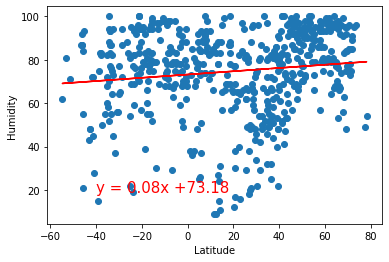

In [130]:
reg_plot(weather_df["Lat"], weather_df["Humidity"])